In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [6]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


Checking for **Null Values** in Train and Test set

In [7]:
train.isnull().sum().sum()

0

In [8]:
test.isnull().sum().sum()

0

In [9]:
## Check Distribution of Label coulmn
train.label.value_counts(normalize=True)*100

1    11.152381
7    10.478571
3    10.359524
9     9.971429
2     9.945238
6     9.850000
0     9.838095
4     9.695238
8     9.673810
5     9.035714
Name: label, dtype: float64

Splitting the Dataset

In [10]:
X=train.drop('label',axis=1)
y=train['label']

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [12]:
X_train.shape , X_test.shape

((29400, 784), (12600, 784))

In [13]:
y_train.shape , y_test.shape

((29400,), (12600,))

In [14]:
X_train.iloc[:,:10].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29400 entries, 17529 to 38408
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   pixel0  29400 non-null  int64
 1   pixel1  29400 non-null  int64
 2   pixel2  29400 non-null  int64
 3   pixel3  29400 non-null  int64
 4   pixel4  29400 non-null  int64
 5   pixel5  29400 non-null  int64
 6   pixel6  29400 non-null  int64
 7   pixel7  29400 non-null  int64
 8   pixel8  29400 non-null  int64
 9   pixel9  29400 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


**Starting with RandomForestClassifier without PCA first**

In [15]:
rf=RandomForestClassifier(random_state=42)

In [16]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [17]:
y_train_pred=rf.predict(X_train)
y_test_pred=rf.predict(X_test)

In [18]:
print(metrics.classification_report(y_train,y_train_pred))
print('-'*20)
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2890
           1       1.00      1.00      1.00      3260
           2       1.00      1.00      1.00      2978
           3       1.00      1.00      1.00      3055
           4       1.00      1.00      1.00      2868
           5       1.00      1.00      1.00      2617
           6       1.00      1.00      1.00      2887
           7       1.00      1.00      1.00      3117
           8       1.00      1.00      1.00      2827
           9       1.00      1.00      1.00      2901

    accuracy                           1.00     29400
   macro avg       1.00      1.00      1.00     29400
weighted avg       1.00      1.00      1.00     29400

--------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1242
           1       0.98      0.98      0.98      1424
           2       0.95      0.96      0.95      1199
   

As seen from above the RandomForest seem to proivde good fit.

#### Using HyperParameter Tuning on RandomForest

In [19]:
param_grid={
                'max_depth': [3, 5, 10, 15, 20],
                'max_features': [3, 5, 7, 11, 15,20],
                'min_samples_leaf': [10, 20, 50, 100, 200, 400],
                'n_estimators': [10, 25, 50, 80, 100]
}

In [20]:
grid_search=GridSearchCV(rf,param_grid = param_grid, n_jobs=-1, cv=5, scoring='accuracy',verbose=1, return_train_score=True)

In [21]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15, 20],
                         'max_features': [3, 5, 7, 11, 15, 20],
                         'min_samples_leaf': [10, 20, 50, 100, 200, 400],
                         'n_estimators': [10, 25, 50, 80, 100]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [22]:
results= pd.DataFrame(grid_search.cv_results_)

In [23]:
results_eval= results[['rank_test_score', 'mean_train_score', 'mean_test_score', 'param_max_depth','param_n_estimators'
                       ,'param_min_samples_leaf', 'param_max_features']].sort_values('rank_test_score')

In [24]:
results_eval.head()

,rank_test_score,mean_train_score,mean_test_score,param_max_depth,param_n_estimators,param_min_samples_leaf,param_max_features
694,1,0.972959,0.945714,15,100,10,20
874,2,0.972993,0.945510,20,100,10,20
693,3,0.972806,0.945102,15,80,10,20
873,4,0.973036,0.944660,20,80,10,20
844,5,0.972211,0.944150,20,100,10,15


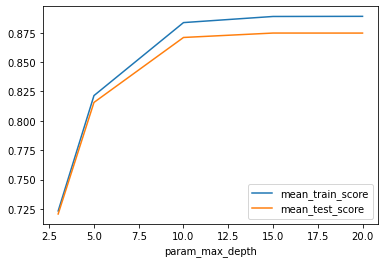

In [25]:
results_eval.groupby('param_max_depth')[['mean_train_score','mean_test_score']].mean().plot()
plt.show()

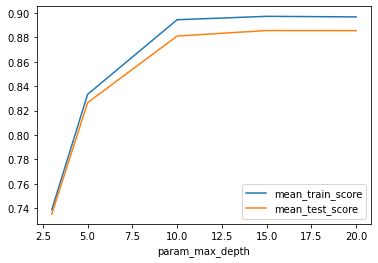

In [26]:
results_eval.groupby('param_max_depth')[['mean_train_score','mean_test_score']].median().plot()
plt.show()

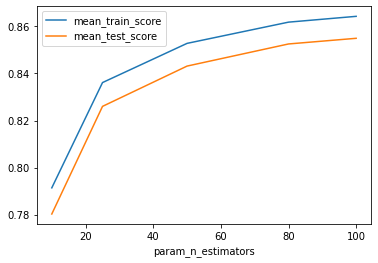

In [27]:
results_eval.groupby('param_n_estimators')[['mean_train_score','mean_test_score']].mean().plot()
plt.show()

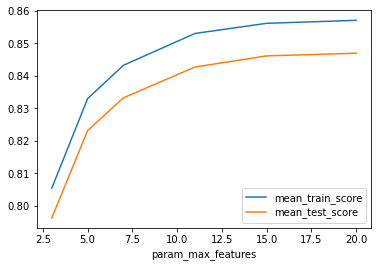

In [28]:
results_eval.groupby('param_max_features')[['mean_train_score','mean_test_score']].mean().plot()
plt.show()

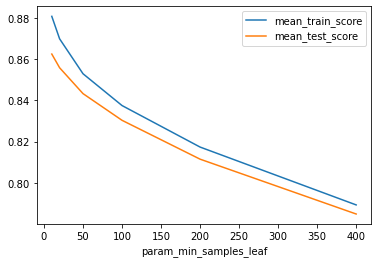

In [29]:
results_eval.groupby('param_min_samples_leaf')[['mean_train_score','mean_test_score']].mean().plot()
plt.show()

As seen from above, the min_samples_leaf and n_estimators need more coarse-tuning.

max_depth =20 can be assumed safely

In [30]:
param_grid2={
                'max_features': [20, 25, 30],
                'min_samples_leaf': [3,5,7,9,15],
                'n_estimators': [100,130, 150, 200, 250]
}

In [31]:
rf= RandomForestClassifier(max_depth=20, random_state=42)

In [32]:
grid_search2=GridSearchCV(rf,param_grid = param_grid2, n_jobs=-1, cv=5, scoring='accuracy',verbose=1, return_train_score=True)

In [33]:
%%time

grid_search2.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
Wall time: 22min 43s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=20, random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [20, 25, 30],
                         'min_samples_leaf': [3, 5, 7, 9, 15],
                         'n_estimators': [100, 130, 150, 200, 250]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [34]:
results= pd.DataFrame(grid_search2.cv_results_)
results_eval2= results[['rank_test_score', 'mean_train_score', 'mean_test_score', 'param_n_estimators'
                       ,'param_min_samples_leaf', 'param_max_features']].sort_values('rank_test_score')

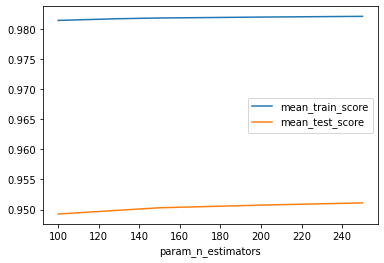

In [35]:
results_eval2.groupby('param_n_estimators')[['mean_train_score','mean_test_score']].mean().plot()
plt.show()

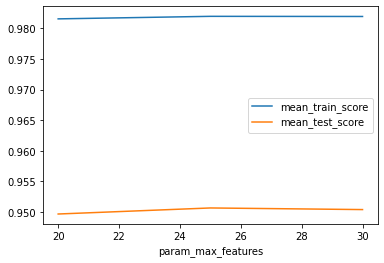

In [36]:
results_eval2.groupby('param_max_features')[['mean_train_score','mean_test_score']].mean().plot()
plt.show()

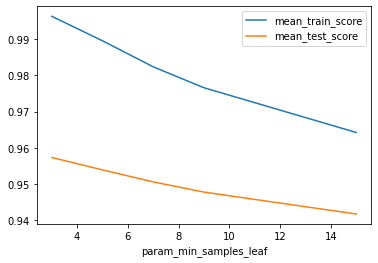

In [37]:
results_eval2.groupby('param_min_samples_leaf')[['mean_train_score','mean_test_score']].mean().plot()
plt.show()

More tuning needed for param_min_samples_leaf

In [41]:
param_grid3={
                'min_samples_leaf': [1,2,3]
                
}

In [42]:
rf= RandomForestClassifier(max_depth=20, random_state=42, n_estimators=180, max_features=25)

In [43]:
grid_search2=GridSearchCV(rf,param_grid = param_grid3, n_jobs=-1, cv=5, scoring='accuracy',verbose=1, return_train_score=True)

In [44]:
%%time

grid_search2.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Wall time: 1min 31s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=20, max_features=25,
                                              n_estimators=180,
                                              random_state=42),
             n_jobs=-1, param_grid={'min_samples_leaf': [1, 2, 3]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [45]:
results= pd.DataFrame(grid_search2.cv_results_)
results_eval2= results[['rank_test_score', 'mean_train_score', 'mean_test_score', 'param_min_samples_leaf']].sort_values(
    'rank_test_score')

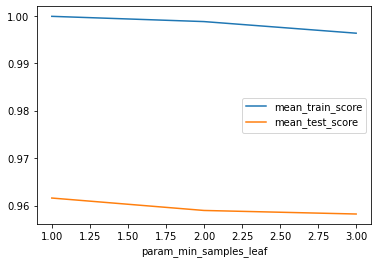

In [46]:
results_eval2.groupby('param_min_samples_leaf')[['mean_train_score','mean_test_score']].mean().plot()
plt.show()

In [47]:
model=grid_search2.best_estimator_

In [48]:
grid_search2.best_score_

0.9615986394557823

In [49]:
model=RandomForestClassifier(max_depth=20, max_features=25, n_estimators=180,min_samples_leaf=1,
                       random_state=42, n_jobs=-1)

In [50]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, max_features=25, n_estimators=180,
                       n_jobs=-1, random_state=42)

In [51]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

print(metrics.classification_report(y_train,y_train_pred))
print('-'*20)
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2890
           1       1.00      1.00      1.00      3260
           2       1.00      1.00      1.00      2978
           3       1.00      1.00      1.00      3055
           4       1.00      1.00      1.00      2868
           5       1.00      1.00      1.00      2617
           6       1.00      1.00      1.00      2887
           7       1.00      1.00      1.00      3117
           8       1.00      1.00      1.00      2827
           9       1.00      1.00      1.00      2901

    accuracy                           1.00     29400
   macro avg       1.00      1.00      1.00     29400
weighted avg       1.00      1.00      1.00     29400

--------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1242
           1       0.98      0.98      0.98      1424
           2       0.95      0.96      0.95      1199
   

## Using PCA

Scaling the data

In [52]:
scaler=StandardScaler()

In [53]:
X_train=scaler.fit_transform(X_train)
x_test=scaler.transform(X_test)

In [54]:
pca=PCA(random_state=100)

In [55]:
pca.fit(X_train)

PCA(random_state=100)

In [56]:
pca.components_.shape

(784, 784)

In [57]:
cumsum=np.cumsum(pca.explained_variance_ratio_)

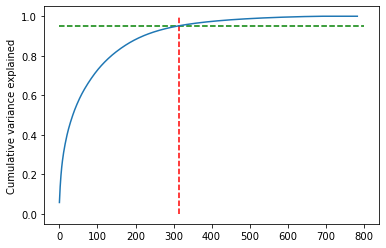

In [58]:
plt.plot(cumsum)
plt.hlines(y=0.95,xmin=0,xmax=800,linestyle='--',color='g')
plt.vlines(x=315,ymin=0,ymax=1, linestyle='--', color='r')
plt.ylabel("Cumulative variance explained")
plt.show()

With Principal Components as 315 we capture nearly 95% variance

**Let's Create a Pipeline to perform Hypertuning of the parameters**

In [59]:
pipe=Pipeline((
('pca', PCA()),
 ('rf',RandomForestClassifier())
))

In [65]:
pca=PCA(n_components=315)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [66]:
param_grid={
#     'pca__n_components':[315],
    'max_features': [ 15,20,25,30],
    'min_samples_leaf': [1,5,10,15],
    'n_estimators': [100,150, 200, 250],
    'max_depth': [ 5, 10, 25, 50]
#     'random_state':[100],
#     'random_state':[100]
}


# rf_pca=RandomForestClassifier(max_depth=20, max_features=25, n_estimators=180,min_samples_leaf=1,
#                        random_state=42, n_jobs=-1)

In [61]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
rf_pca=RandomForestClassifier()
cv=RandomizedSearchCV(rf_pca, param_grid,scoring='accuracy',n_jobs=-1, verbose=1, return_train_score=True, cv=4, n_iter=150)

In [68]:
%%time

cv.fit(X_train,y_train)

Fitting 4 folds for each of 150 candidates, totalling 600 fits
Wall time: 52min 27s


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 25, 50],
                                        'max_features': [15, 20, 25, 30],
                                        'min_samples_leaf': [1, 5, 10, 15],
                                        'n_estimators': [100, 150, 200, 250]},
                   return_train_score=True, scoring='accuracy', verbose=1)

In [69]:
results= pd.DataFrame(grid_search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.972138,0.138215,0.094772,0.011563,3,3,10,10,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.593197,...,0.600578,0.005827,895,0.588393,0.607866,0.610927,0.615604,0.594515,0.603461,0.010292
1,1.168631,0.142164,0.091668,0.009632,3,3,10,25,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.702211,...,0.692143,0.006414,851,0.690561,0.697662,0.695238,0.698469,0.685757,0.693537,0.004767
2,1.768182,0.207427,0.137031,0.023082,3,3,10,50,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.742517,...,0.731224,0.006595,804,0.735289,0.738393,0.738478,0.732398,0.727126,0.734337,0.004249
3,2.042220,0.242193,0.139567,0.014316,3,3,10,80,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.768027,...,0.753061,0.008316,732,0.758206,0.758121,0.755910,0.752083,0.755910,0.756046,0.002223
4,2.228397,0.246963,0.155128,0.048461,3,3,10,100,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.763605,...,0.750476,0.007426,746,0.756335,0.755740,0.755017,0.750553,0.752551,0.754039,0.002167


In [70]:
results_eval= results[['rank_test_score', 'mean_train_score', 'mean_test_score', 'param_max_depth','param_n_estimators'
                       ,'param_min_samples_leaf', 'param_max_features']].sort_values('rank_test_score')

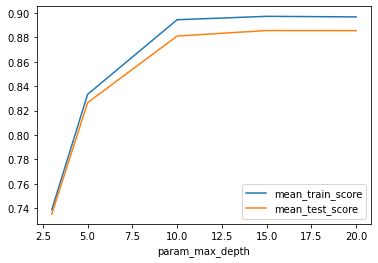

In [71]:
results_eval.groupby('param_max_depth')[['mean_train_score','mean_test_score']].median().plot()
plt.show()

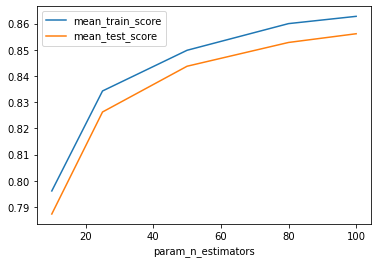

In [72]:
results_eval.groupby('param_n_estimators')[['mean_train_score','mean_test_score']].median().plot()
plt.show()

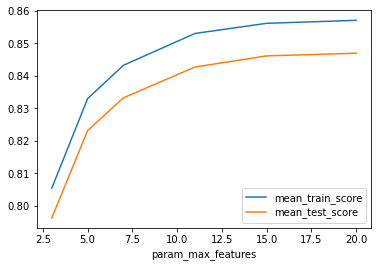

In [73]:
results_eval.groupby('param_max_features')[['mean_train_score','mean_test_score']].mean().plot()
plt.show()

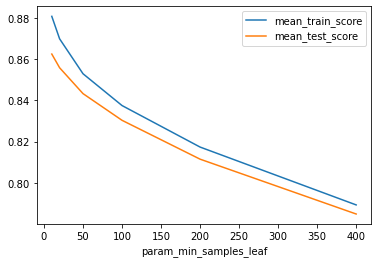

In [74]:
results_eval.groupby('param_min_samples_leaf')[['mean_train_score','mean_test_score']].mean().plot()
plt.show()

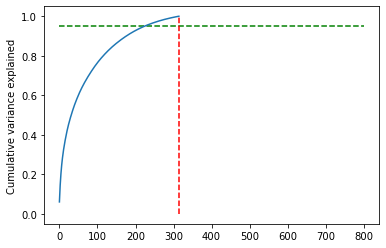

In [75]:
cumsum=np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
plt.hlines(y=0.95,xmin=0,xmax=800,linestyle='--',color='g')
plt.vlines(x=315,ymin=0,ymax=1, linestyle='--', color='r')
plt.ylabel("Cumulative variance explained")
plt.show()

In [76]:
cv.best_estimator_

RandomForestClassifier(max_depth=50, max_features=30, n_estimators=250)

In [77]:
cv.best_score_

0.9322108843537416

In [79]:
sub = pd.DataFrame(columns=['ImageId','Label'])

In [82]:
prediction= model.predict(test)
prediction.shape

(28000,)

In [89]:
sub['ImageId']=test.index+1
sub['Label']=prediction
sub

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [90]:
sub.to_csv('submission.csv',index=False)

In [93]:
A = np.array([[4, 9], 
              [7, 6]])

# c is the array of eigenvalues
# v is the matrix with eigenvectors as the columns
c, v = np.linalg.eig(A)
print(c)
print(v)

[-3. 13.]
[[-0.78935222 -0.70710678]
 [ 0.61394061 -0.70710678]]
